## 2.3 데이터 가져오기

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # "datasets/housing" 반환
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # os.makedirs(A) : 해당 경로를 생성합니다.
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    # urllib.request.urlretrieve(A,name) : 해당 url에서 파일을 name이름으로 받아옵니다.
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # tar, tgz 압축 파일을 가져오고(open), 압축을 해당 경로에 풀어냅니다(extractall).
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
#fetch_housing_data()

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# null값과 object객체요소는 제외하고 실행됩니다.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


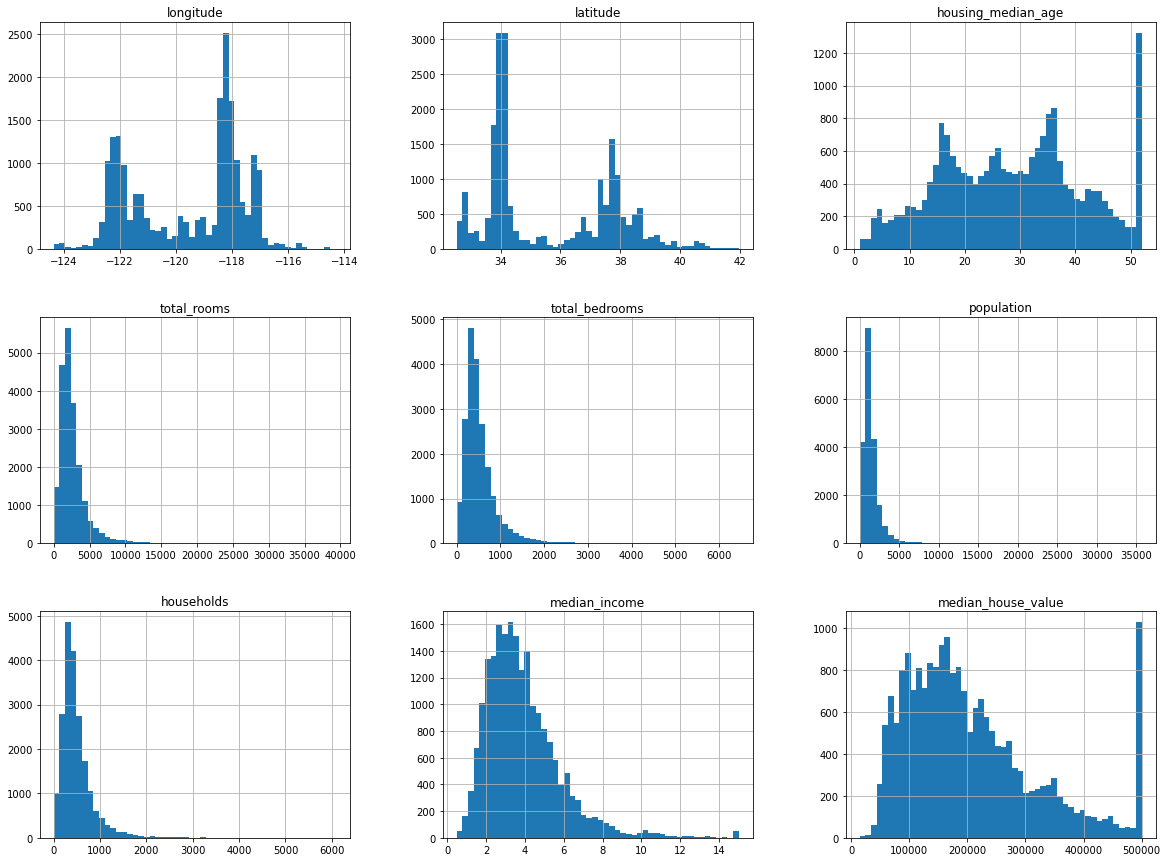

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# pandas 객체로 hist를 나타낼 수 있었다...!, bins는 정밀도를 나타낸다.
housing.hist(bins=50, figsize=(20,15))
plt.show()

housing_median_age와 median_house_value는 애초에 수집될 때, 최댓값이 정해져있어서, 설정 최댓값 이상인 경우 모두 최댓값으로 설정되게 되어있다. 이는 학습에 큰 영향을 끼칩니다.

data snooping bias: 테스트 세트로 일반화 오차를 추정하여 cheating하였을 때, 배포했을 때, 기대한 성능이 나오지 않는 것을 뜻한다.

보통 테스트셋을 전체의 20%를 쓴다. 데이터셋이 많아지면 더 적게.

In [16]:
from sklearn.model_selection import train_test_split

# random_state를 설정해놓는 것이 좋다. 그렇지 않으면 테스트셋이 매번 달라지고, 테스트셋을 cheating하는 셈이 되기 때문이다...
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

stratified sampling(계층적 샘플링): 각 Feature에서의 value label 별로 일정한 비율로 샘플링하는 것

In [19]:
import numpy as np

# feature 범주화. pandas의 cut함수를 사용하여 범주를 정해 새로운 라벨을 지정한다.
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# StratifiedShuffleSplit.split(DF, Series_column) : DF의 index를 참고하여, column에서 라벨별로 분류한다. 그리고 참고한 index를 반환
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
# 다시 원래대로~
# df.drop(column_name, axis, inplace) : axis가 1이면 행삭제, 0이면 열삭제, inplace가 true면 reuturn값 없이 바로 반영
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.4 데이터 이해를 위한 탐색과 시각화

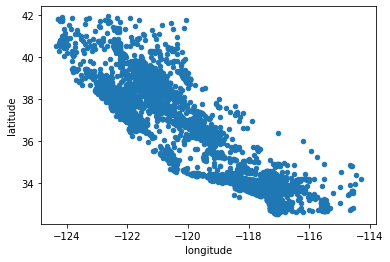

In [29]:
housing = strat_train_set.copy()
# df에서는 역시 plot도 제공한다. kind를 scatter로 설정하면 산점도를 보여준다.
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

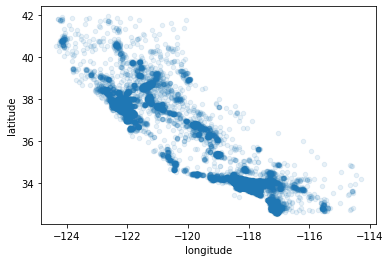

In [34]:
# alpha를 적용하면 밀집 정도를 알 수 있다.
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

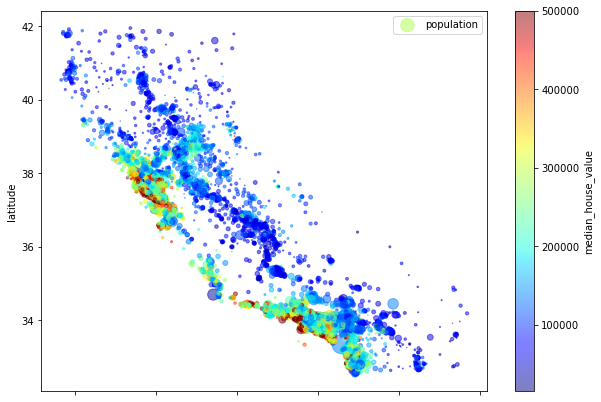

In [40]:
housing.plot(kind= 'scatter', x= 'longitude', y='latitude', alpha=0.5,
            s=housing['population']/100, label='population', figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [52]:
# corr를 이용하면 표준 상관계수를 알 수 있다.
# 1에 가까울수록, 양의 상관관계. -1에 가까울수록, 음의 상관관계. 0에 가까울수록 상관관계 없음을 의미한다.
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

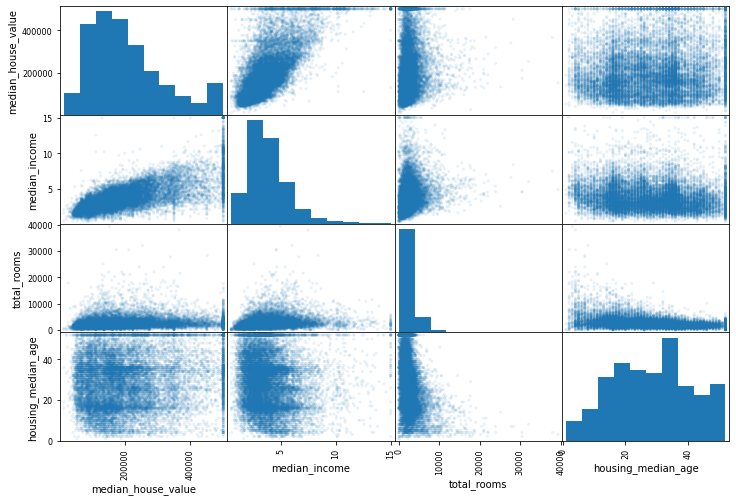

In [57]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

In [59]:
# 특성 조합
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 2.5 머신러닝 알고리즘을 위한 데이터 준비